# About Dataset

The `data.csv` file contains more than **160,000 songs** collected from the **Spotify Web API**. The dataset includes **169k songs** spanning from the year **1921 to 2020**, with the **top 100 songs for each year**.

---

## Primary

- **id**: ID of track generated by Spotify

---

## Numerical Features

- **acousticness**: Ranges from 0 to 1
- **danceability**: Ranges from 0 to 1
- **energy**: Ranges from 0 to 1
- **duration_ms**: Integer typically ranging from 200,000 to 300,000
- **instrumentalness**: Ranges from 0 to 1
- **valence**: Ranges from 0 to 1
- **popularity**: Ranges from 0 to 100
- **tempo**: Float typically ranging from 50 to 150
- **liveness**: Ranges from 0 to 1
- **loudness**: Float typically ranging from -60 to 0
- **speechiness**: Ranges from 0 to 1
- **year**: Ranges from 1921 to 2020

---

## Dummy (Binary) Features

- **mode**: 0 = Minor, 1 = Major
- **explicit**: 0 = No explicit content, 1 = Explicit content

---

## Categorical Features

- **key**: All keys in an octave encoded as values ranging from 0 to 11  
  (starting from C = 0, C# = 1, ..., B = 11)
- **artists**: List of artists mentioned
- **release_date**: Date of release, mostly in `yyyy-mm-dd` format (date precision may vary)
- **name**: Name of the song


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
sns.set_style("whitegrid")
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

# 1. Čišćenje podataka

In [3]:
# Provjeriti nedostajuce vrijednosti
print(df.isnull().sum())

# Potvrditi da je goina unutar intervala
df = df[(df['year'] >= 1921) & (df['year'] <= 2020)]
df['year'] = df['year'].astype(int)

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64


Nema nedostajucih vrijednost

In [4]:
# Pretvoriti ćemo duljinu pjesme iz milisekundi u minute
df['duration_min'] = df['duration_ms'] / 60000

# 2. Trendovi

In [5]:
# Grupirati podatke i izraćunati prosjeke
yearly_means = df.groupby('year')[['acousticness', 'danceability', 'energy', 'valence', 'duration_min', 'popularity']].mean().reset_index()

### Prikazati ćemo trendove grafovima

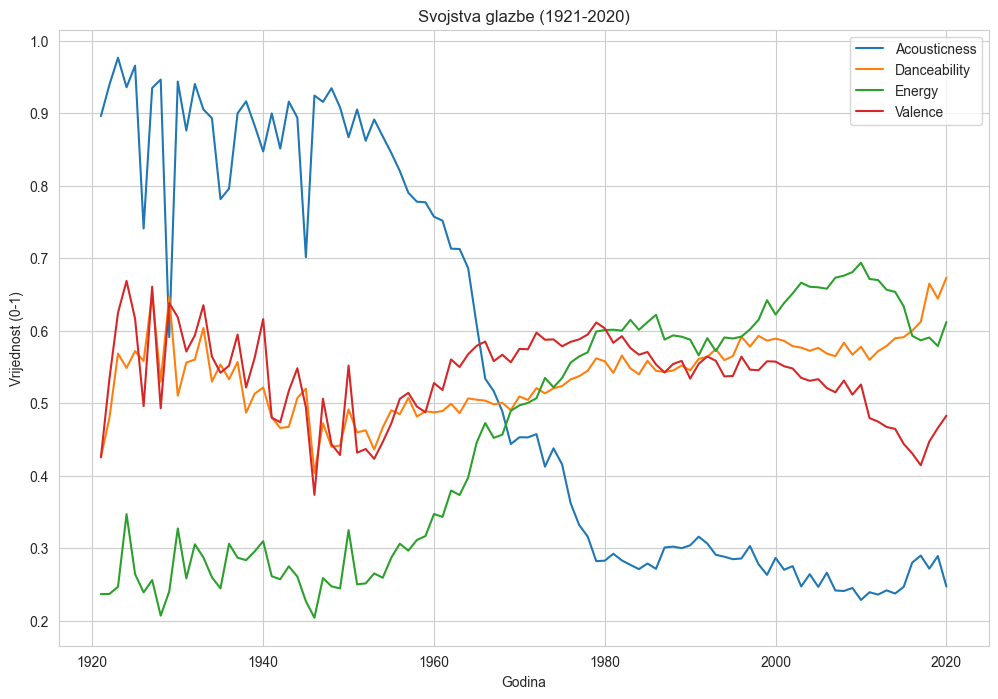

In [6]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_means, x='year', y='acousticness', label='Acousticness', color='#1f77b4')
sns.lineplot(data=yearly_means, x='year', y='danceability', label='Danceability', color='#ff7f0e')
sns.lineplot(data=yearly_means, x='year', y='energy', label='Energy', color='#2ca02c')
sns.lineplot(data=yearly_means, x='year', y='valence', label='Valence', color='#d62728')
plt.title("Svojstva glazbe (1921-2020)")
plt.xlabel('Godina')
plt.ylabel('Vrijednost (0-1)')
plt.show()

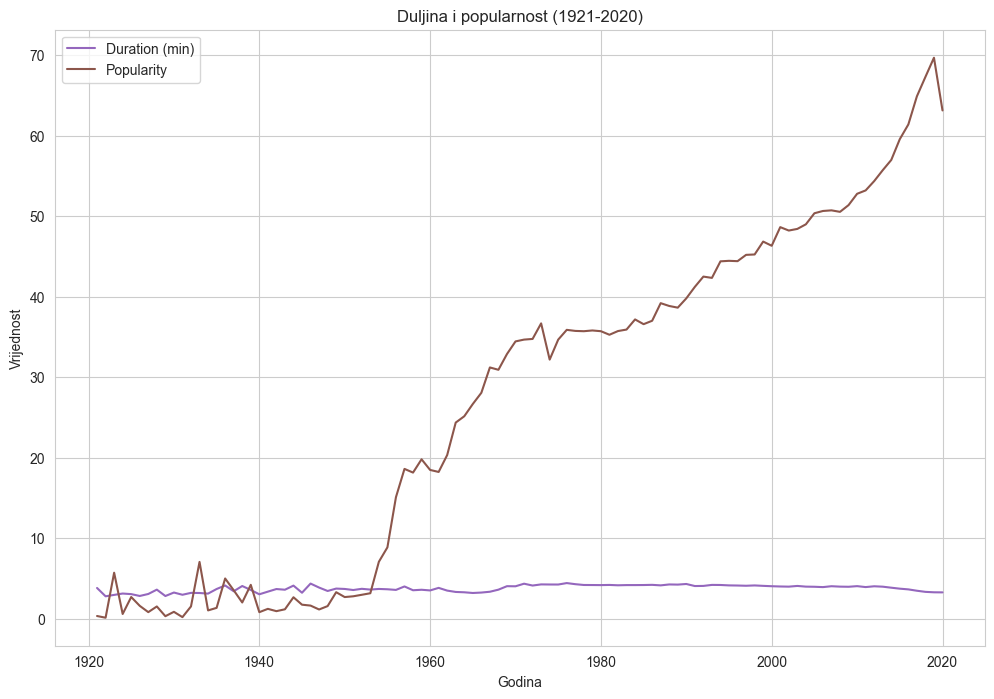

In [7]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_means, x='year', y='duration_min', label='Duration (min)', color='#9467bd')
sns.lineplot(data=yearly_means, x='year', y='popularity', label='Popularity', color='#8c564b')
plt.title('Duljina i popularnost (1921-2020)')
plt.xlabel('Godina')
plt.ylabel('Vrijednost')
plt.legend()
plt.show()

### Grupirajući po godinama dobivamo puno šuma, tako da ne možemo direktno zaključiti kako se glazba mijenjala kroz povijest
### Grupirati ćemo pjesme po desetljećima za jednostavniju analizu trendova

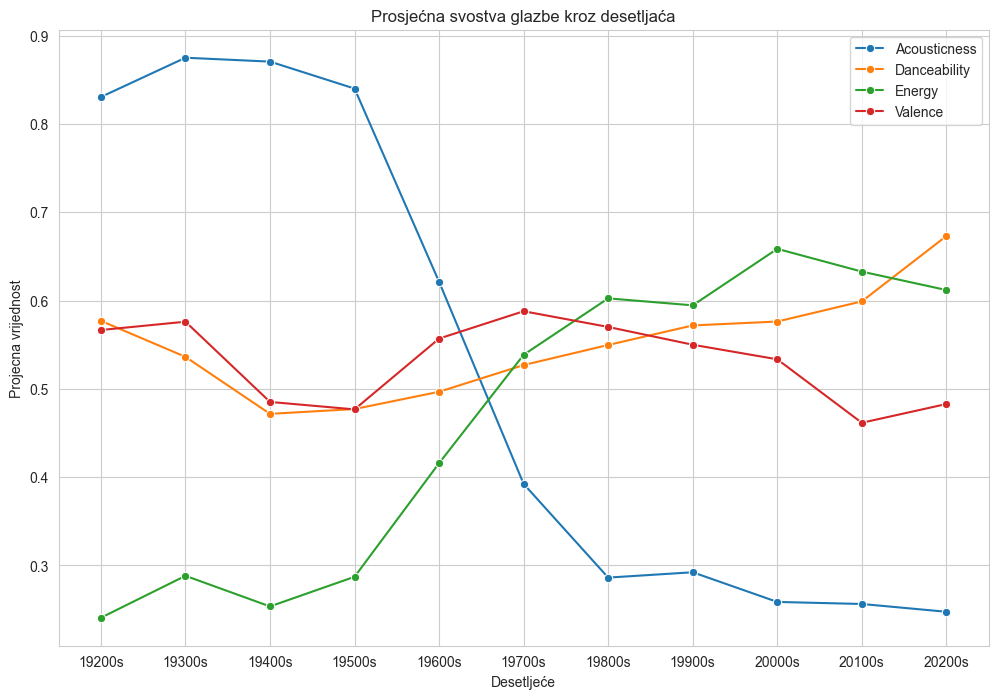

In [8]:
df['decade'] = (df['year'] // 10) * 10

decade_means = df.groupby('decade')[['acousticness', 'danceability', 'energy', 'valence', 'duration_min', 'popularity']].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=decade_means, x='decade', y='acousticness', label='Acousticness', color='#1f77b4', marker='o')
sns.lineplot(data=decade_means, x='decade', y='danceability', label='Danceability', color='#ff7f0e', marker='o')
sns.lineplot(data=decade_means, x='decade', y='energy', label='Energy', color='#2ca02c', marker='o')
sns.lineplot(data=decade_means, x='decade', y='valence', label='Valence', color='#d62728', marker='o')
plt.title('Prosjećna svostva glazbe kroz desetljaća')
plt.xlabel('Desetljeće')
plt.ylabel('Projecna vrijednost')
plt.legend()
plt.xticks(decade_means['decade'], [f"{d}0s" for d in decade_means['decade']])
plt.grid(True)
plt.show()

#### **Osnovna zapažanja**
##### **Akustičnost**
 - Počinje visoko (0,85) u 1920-ima i polako pada na 0,3 do 2020-ih sa ogromnim padom 1950-1980-ih
##### **Plesnost**
 - Postopno raste, veliki porasti između 1950-1960 i 1980-1990
##### **Valencija**
 - Vremenom pada, posbno nakon 1980-ih
##### **Energija**
 - Počinje nisko (0,3), raste postupno, doseže vrhunac od 0,65 u 1980-ima i 90-ima
 - najizraženiji porast dogodio se od 1950-ig do 80-ih

 
---


### **Zaključci o glazbi tijekom vremena**
#### 1. Smanjenje akustičnosti
 - Glazba je vremenom postala manje akustična
 - Ovo može biti posljedica toga što se prije više nastupalo uživo, te se vremenom prelazilo na elektroničko slušanje pjesama
 - Nagli pad nakon 1950-ih savršeno se poklapa sa pojavom elektičnih gitara 
 - *"During the 1950s and 1960s, the electric guitar became the most important instrument in popular music"* *izvor: [Encyclopedia of 20th-century Technology](https://books.google.hr/books?id=0wkIlnNjDWcC&pg=PA793&redir_esc=y)*
 - Drugi nagli pad događa se 90-ih kada se glazba počinje više slušati digitalno

#### 2. Povećanje plesnost
 - Pjesme su postale plesnije, posebno od 50-ih, što se poklapa s pojavom žanrova poput rock 'n' rolla (50-te), diska(70-te) te modernog popa, hip-hopa i EDM-a (90-e i 20-e)
 - Vrhunac u 2020-ima vjerojatno se dogodio zbog sve više društvenih mreža na kojima najviše uspijevaju ritmične pjesme (npr. izvođači poput The Weeknda, Dua Lipe, Taylor Swift)

#### 3. Porast i stabilizacija energije
 - Energija naglo je rasla od 50-ih do 80-ih, vjerojatno zbog energičnih žanrova koji su se tada pojavili poput rocka, punka i rane elektroničke glazbe
 - Vrhunac u 80-ima i 90-ima odgovara vrhuncu energičnih stilova glazbe poput arena rocka, synth-popa i ranog hip-hopa
 - Blagi pad u 2020-ima može odgovarati pomaku prema smirenijim stilovima poput lo-fi ili indie pop

#### 4. Smanjenje valencije (veselosti)
 - Pjesme su postale manje "vesele" tijekom vremena
 - Ranije (1920-1950) pjesme su bile veselike (npr. swing, rani pop), dok kasnije pjesme postaju manje vesele što odgovara usponu žanrova poput grungea (1990-e), emoa i modernog popa/"hip-hopa" npr. Billie Eilish, Drake

---

### **Povijesni i kulturni kontekst**
 - 1920-e-1940-e: Visoka akustičnost i umjerena valencija pokazuju prevlast akustičnog jazza i bluesa, često vedrih kako bi podigli raspoloženje tijekom Velike depresije
 - 1950-e-1960-e: Porast energije i plesnosti poklapa se s rock n rollom koji se izdigao i postao glazba mladih poslije WWII
 - 1970-e-1980-e: Vrhunac energije (rock, disco), plesnost raste zbog plesnih žanrova, akustičnost pada jer sintisajzeri postaju sve dostupniji
 - 1990-e-2020-e: Plesnost nastavlja rasti s popom i EDM-om, valencija pada jer glazba istražuje mračnije teme. Streaming platforme poput spotify-ja, apple musica i sl. možda facoritiziraju plese pjesme te zato dolazi do toliko popularnosti

### **Zašto se događaju projmene?**
 - **Tehnologija**: smanjenje akustičnosti pokazuje napredak u glazbenoj produkciji, od električnih instrumenata do digitalnog kreiranja glazbe
 - **Kulturne promjene**: Pad valencije pokazuje veći fokus na emocionalniju glazbu
 - **Utjecaj industije**: Visoka plesnost u 2020-ima vjeorjatno je potaknuta algoritmima streaming platformi koji favoritiziraju privlačne, vedre pjesme

---

#### **Istražimo i duljinu i popularnost po desetljećima**
 - *potreban je novi plot zbog velike razlike u skalama*

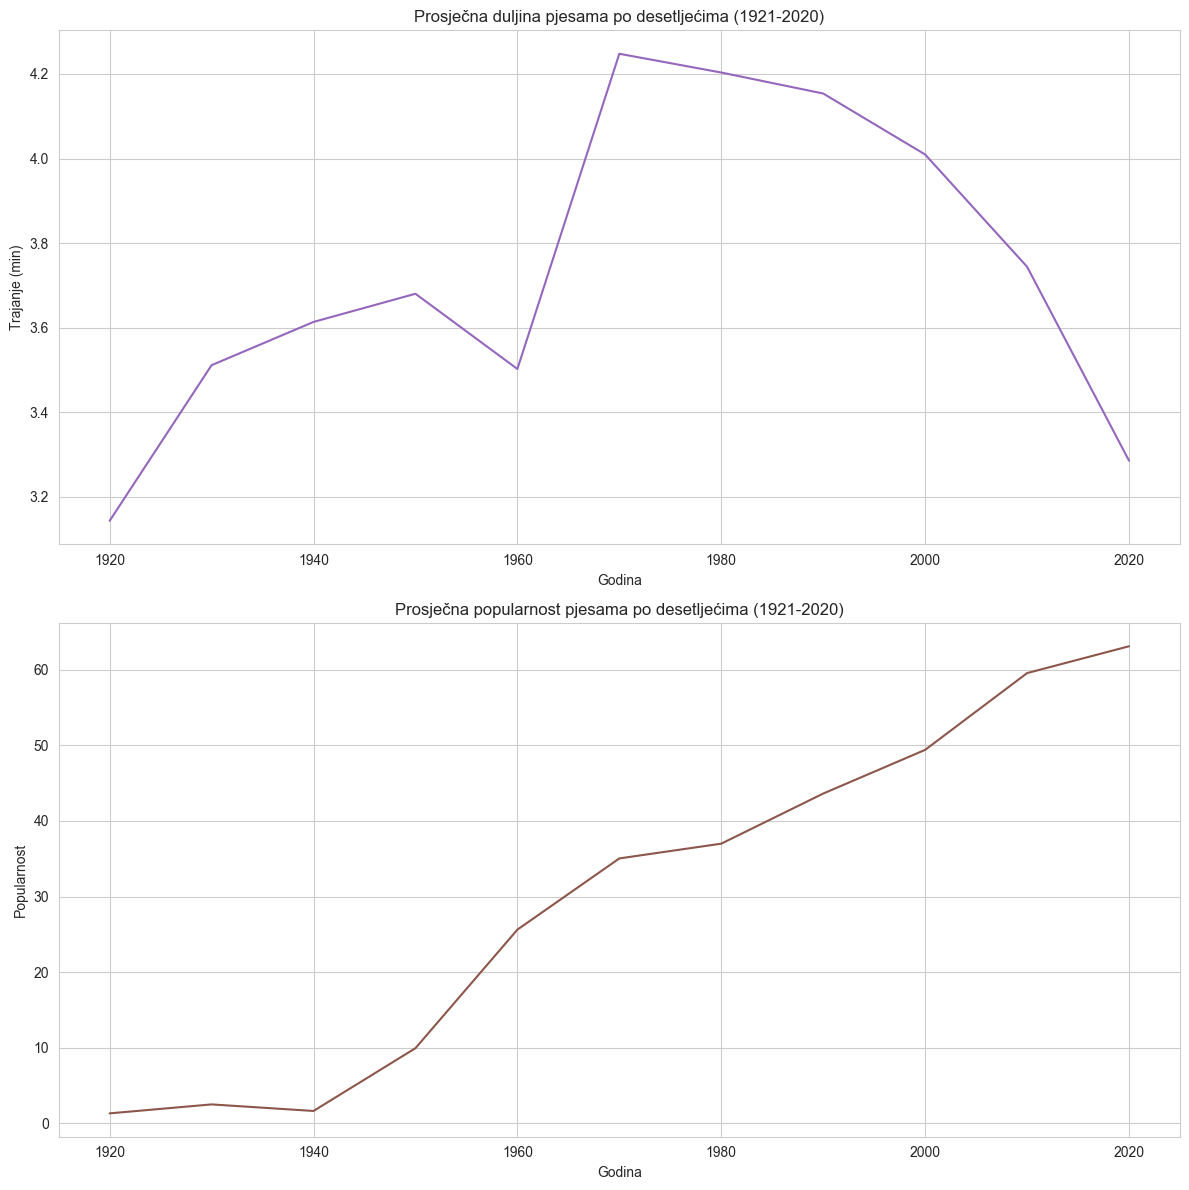

In [9]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.lineplot(data=decade_means, x='decade', y='duration_min', color='#9467bd')
plt.title('Prosječna duljina pjesama po desetljećima (1921-2020)')
plt.xlabel('Godina')
plt.ylabel('Trajanje (min)')

plt.subplot(2, 1, 2)
sns.lineplot(data=decade_means, x='decade', y='popularity', color='#8c564b')
plt.title('Prosječna popularnost pjesama po desetljećima (1921-2020)')
plt.xlabel('Godina')
plt.ylabel('Popularnost')

plt.tight_layout()
plt.show()

#### *Zaključci o duljini i popularnosti pjesama*
 ##### 1. Duljina pjesama:
 - Duljina ostaje relativno jednaka, kraće pjesme vidimo porast u 1980-ima koji je vjerojatno povezan s pojavom dužih rock i pop pjesama (npr. *"Stairway to Heaven"*)
 - 90-ih duljina počinje opadati i nastavlja padati do 2020-ih vraćajući se na 3,2 min, ovo je vjerojatno utjecaj streaming platformi koje favoritiziraju kraće pjesme kako bi zadržale pažnju. Također može ukazivati na modernije formate popa, hip hopa i EDM-a, gdje se često koriste kratki "catchy" segmenti zbog prilagodbe društvenim mrežama

 #### 2. Popularnost
 - Popularnost značajno raste tijekom vremena
 - Niski rezultati u do 50-ih godina posljedica su toga što starije pjesme nisu bile dostupne svima kao danas
 - Nagli porast 1980-ih poklapa se pojavom *MTV-a (est. 1981.)* i kasnije digitalnim platformama koje su omogućile veću dostupnost pjesama
 - Vrhunac u 2020-ima rezultat je streaming platformi, gdje su moderne pjesme češće slušane zbog algoritama preporuke pjesama i dostupnosti svima

In [10]:
key_decade = df.groupby(['decade', 'key']).size().unstack(fill_value=0)
mode_decade = df.groupby(['decade', 'mode']).size().unstack(fill_value=0)

### Analizirat ćemo tonove i modove

In [11]:
# Grupiramo po tonu/modu
key_decade = df.groupby(['decade', 'key']).size().unstack(fill_value=0)
mode_decade = df.groupby(['decade', 'mode']).size().unstack(fill_value=0)

In [12]:
# Dobivamo postotak pjesama po desetljeću
key_decade_pct = key_decade.div(key_decade.sum(axis=1), axis=0) * 100
mode_decade_pct = mode_decade.div(mode_decade.sum(axis=1), axis=0) * 100


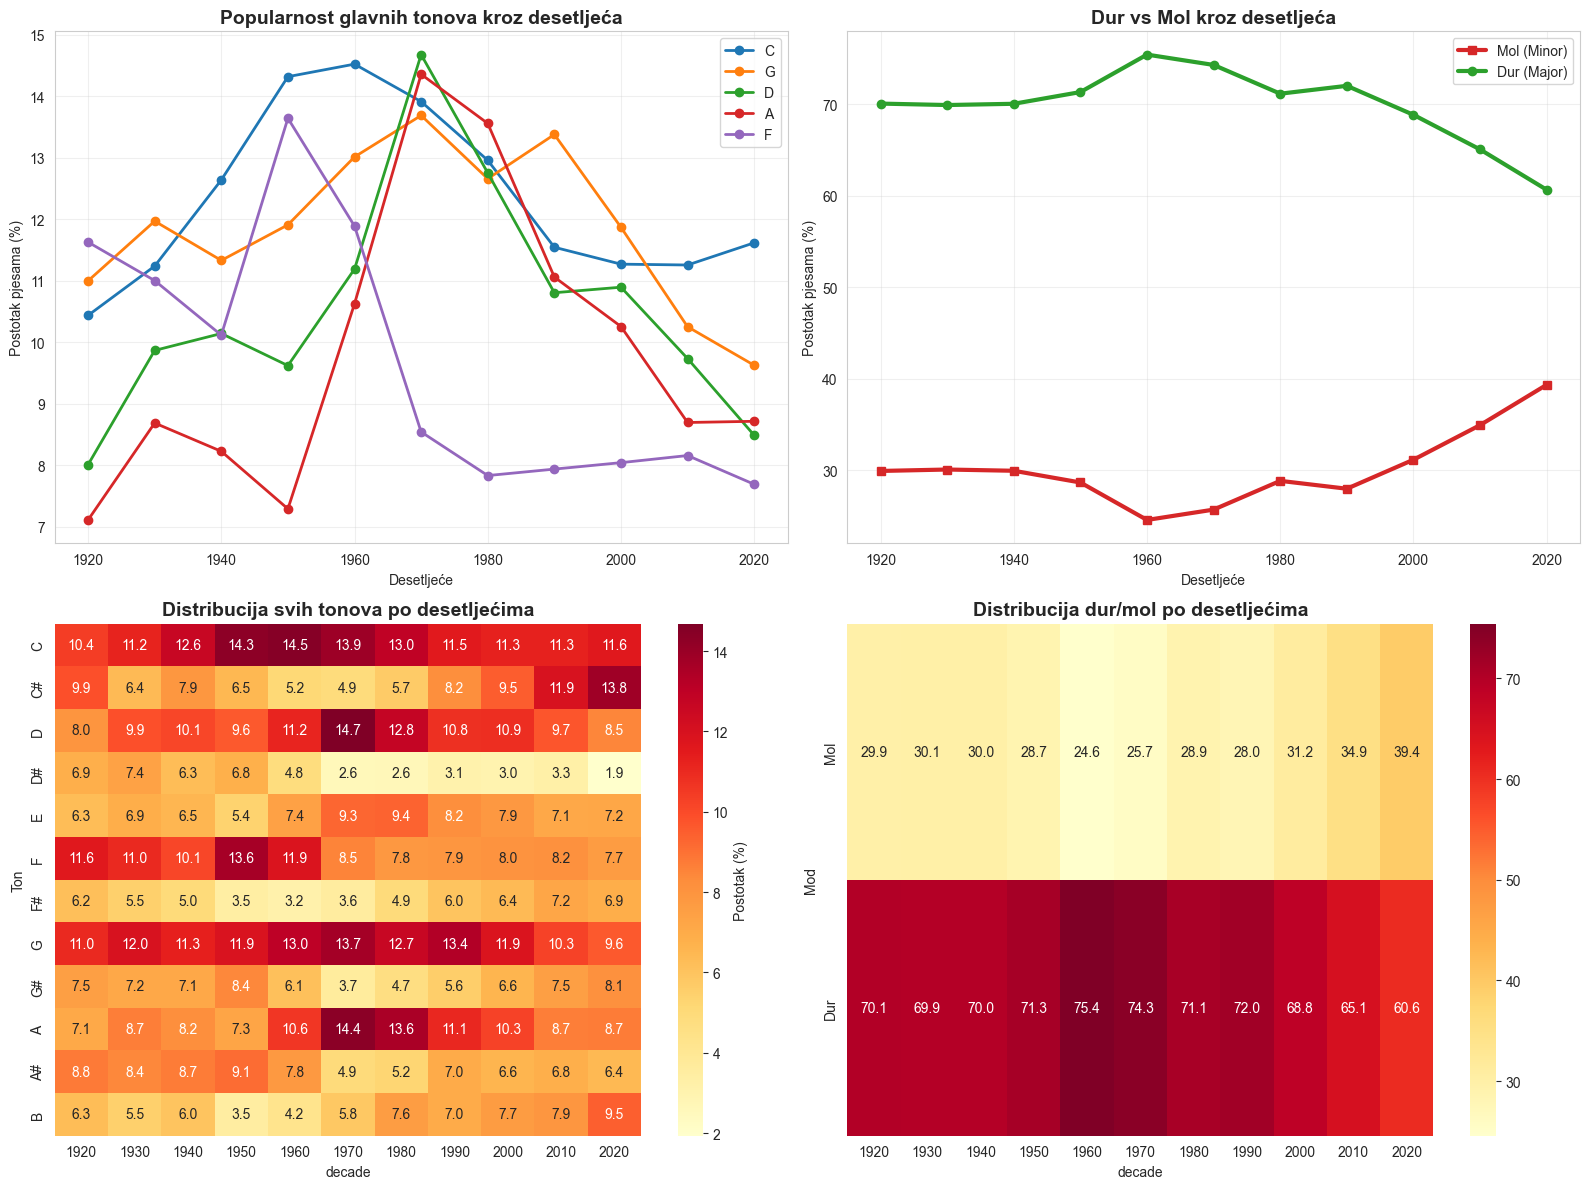

In [13]:
# iz df dokumentacije: key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Zbog vizualizacije uzimamo samo 5 najčešćih tonova
top_keys = key_decade.sum().nlargest(5).index

for i, key in enumerate(top_keys):
    axes[0,0].plot(key_decade_pct.index, key_decade_pct[key], marker='o', label=key_names[key], linewidth=2)

axes[0,0].set_title('Popularnost glavnih tonova kroz desetljeća', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Desetljeće')
axes[0,0].set_ylabel('Postotak pjesama (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Dur vs Mol

axes[0,1].plot(mode_decade_pct.index, mode_decade_pct[0], marker='s', label='Mol (Minor)', linewidth=3, color='#d62728')
axes[0,1].plot(mode_decade_pct.index, mode_decade_pct[1], marker='o', label='Dur (Major)', linewidth=3, color='#2ca02c')

axes[0,1].set_title('Dur vs Mol kroz desetljeća', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Desetljeće')
axes[0,1].set_ylabel('Postotak pjesama (%)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Svi tonovi kroz desetljeća
sns.heatmap(key_decade_pct.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,0], cbar_kws={'label': 'Postotak (%)'})
axes[1,0].set_title('Distribucija svih tonova po desetljećima', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Ton')
axes[1,0].set_yticklabels(key_names)

# Dur vs mol kroz desetljeća
sns.heatmap(mode_decade_pct.T, annot=True, fmt=".1f", cmap="YlOrRd", ax=axes[1,1], cbar={'label': 'Postotak (%)'})
axes[1,1].set_title("Distribucija dur/mol po desetljećima", fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Mod')
axes[1,1].set_yticklabels(['Mol', 'Dur'])


plt.tight_layout()
plt.show()


##### **Analiza tonova i modova**
  #### Tonovi
  - 1920-50-te najčešći su C i D tonovi, koji odgovaraju jednostavnim akordima u jazzu
  - u 1950-ima naglo raste A ton, to je utjecaj rock n rolla i countryja npr. Elvis Presley, kojemu je A najčešći ton
  - od 1960-ih pa nadalje nema velike razlike između tonova, također vidimo kako manji postotak pjesama ima 5 najčešćih tonova kao glavne, ovo ukazuje na veću raznolikost žanrova (pop, hip hop, EDM), gdje odabir tonova nije više predvidiv
 #### Modovi
  - Dur tonovi dominirali su do 50-ih, kada se slušala vedrija glazba
  - Trend rasta mol tonova od 1980-ih poklapa se sa trendom modernog hip hopa i emo žanra (Billie Eilish, Drake)
  - Pad dur tonova i porast mol tonova potvrđuju ranije uočeni pad valencije

### **Analiza tempo**

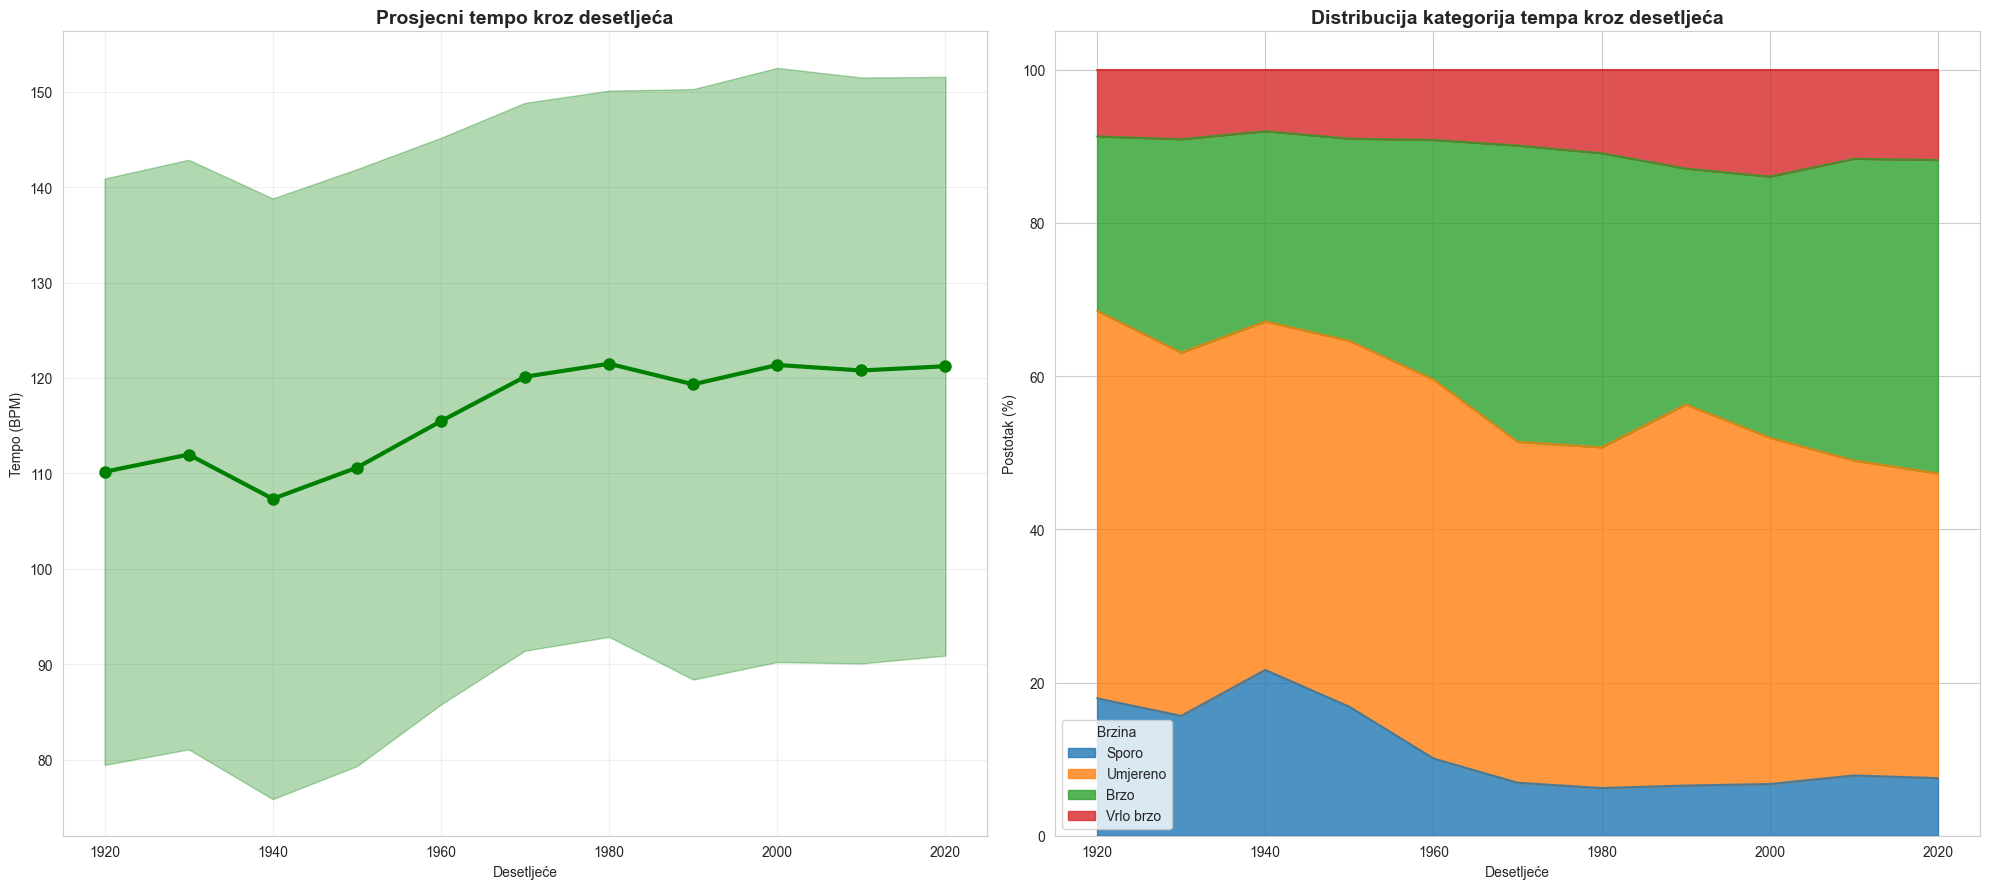

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))

# Prosjecni tempo po desetljecima
tempo_decade = df.groupby('decade')['tempo'].agg(['mean', 'std'])

axes[0].plot(tempo_decade.index, tempo_decade['mean'], marker='o', linewidth=3, markersize=8, color="green")
axes[0].fill_between(tempo_decade.index, tempo_decade['mean']-tempo_decade['std'], tempo_decade['mean']+tempo_decade['std'], alpha=0.3, color="green")

axes[0].set_title('Prosjecni tempo kroz desetljeća', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Desetljeće')
axes[0].set_ylabel('Tempo (BPM)')
axes[0].grid(True, alpha=0.3)

# Tempo kroz desetljeća
df['tempo_category'] = pd.cut(df['tempo'], bins=[0, 80, 120, 160, 300], labels=['Sporo', 'Umjereno', 'Brzo', 'Vrlo brzo'])
tempo_decade_category = df.groupby(['decade', 'tempo_category']).size().unstack(fill_value=0)
tempo_decade_category_pct = tempo_decade_category.div(tempo_decade_category.sum(axis=1), axis=0) * 100

tempo_decade_category_pct.plot(kind="area", stacked=True, ax=axes[1], alpha=0.8)
axes[1].set_title('Distribucija kategorija tempa kroz desetljeća', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Desetljeće')
axes[1].set_ylabel('Postotak (%)')
axes[1].legend(title='Brzina')

plt.tight_layout()
plt.show()


#### *Tempo*
 - Porast BPM-a od 40-ih do 70-ih poklapa se s pojavom bržih žanrova popur rock n rolla (1950), rocka i disca (1970-e) gdje je glazba brža
 - Stabililzacija na 120 BPM od 1980-ih nadalje odgovara standardnom tempu u popu, hip hopu i EDM-u, gdje je 120 idealan BPM; izvor: [DJ STUDIO](https://dj.studio/blog/tempos-bpms-edm)

##### *Kategorije tempa:*
 - Sporo (<80 BPM)
 - Umjereno (80-120 BPM)
 - Brzo (120-160 BPM)
 - Vrlo brzo (>160 BPM) 


#### **Analiza glasnoće**


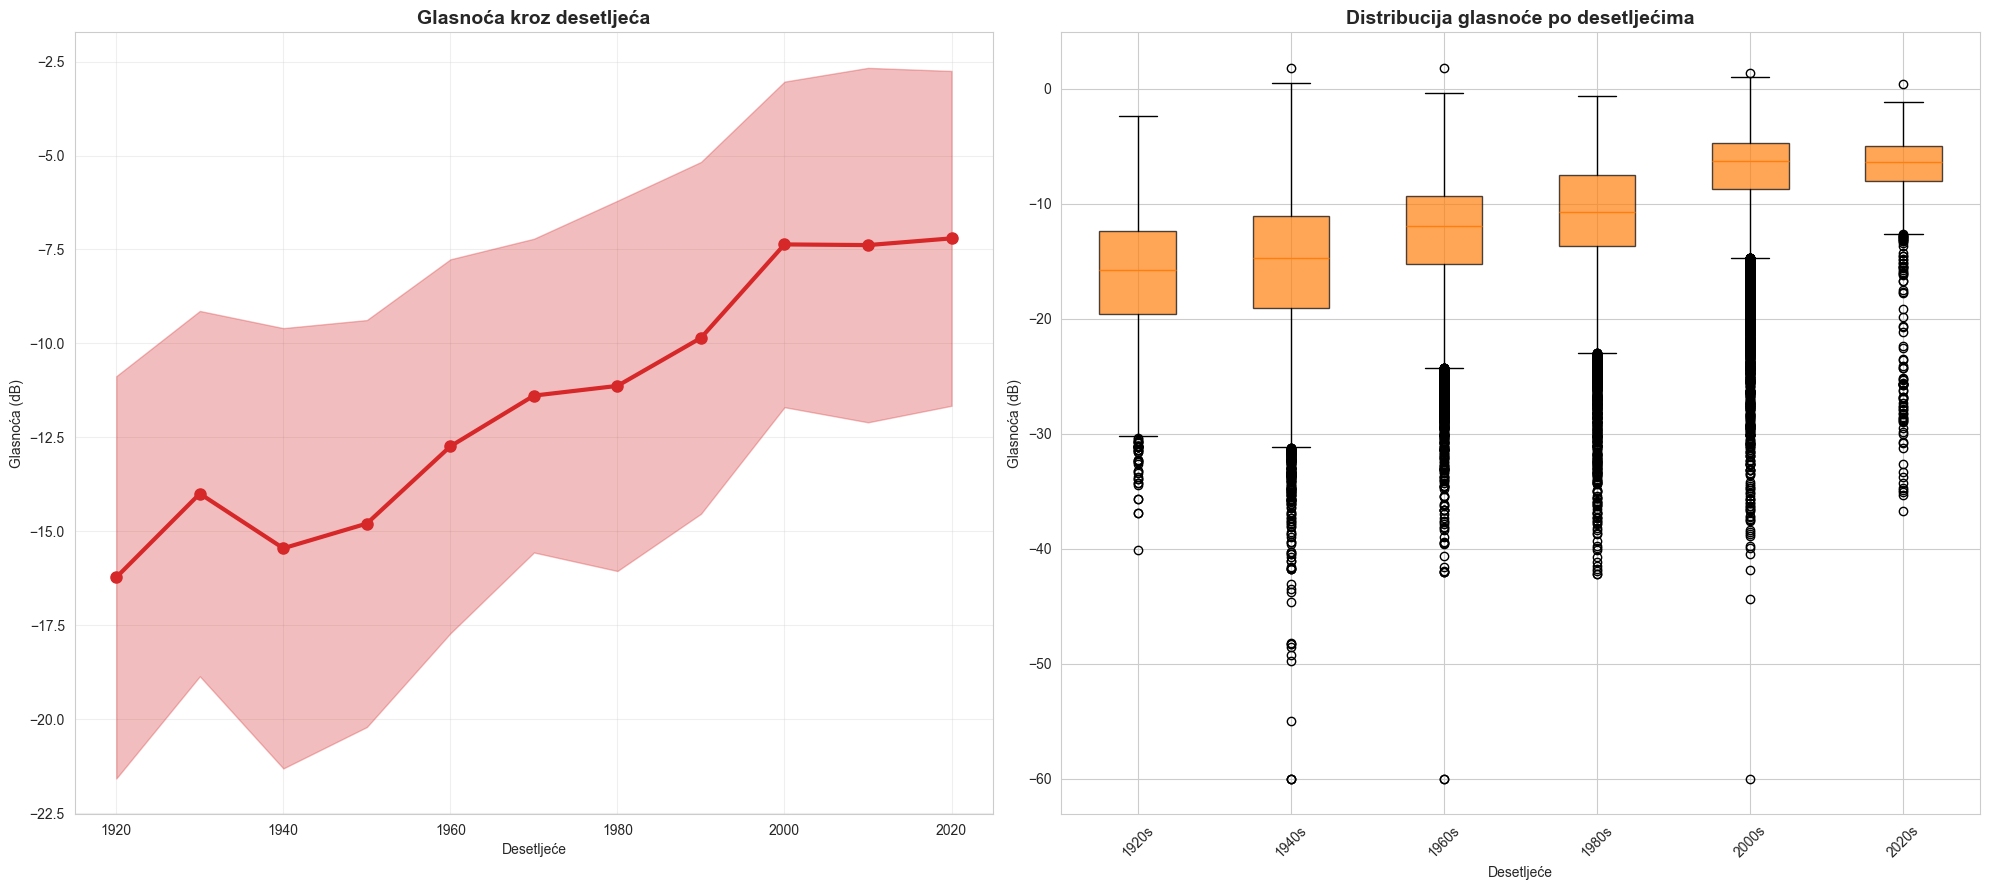

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))
loudness_decade = df.groupby('decade')['loudness'].agg(['mean', 'std'])

axes[0].plot(loudness_decade.index, loudness_decade['mean'], marker='o', linewidth=3, markersize=8, color="#d62729")
axes[0].fill_between(loudness_decade.index, 
                     loudness_decade['mean'] - loudness_decade['std'],
                     loudness_decade['mean'] + loudness_decade['std'],
                     alpha=0.3, color="#d62729")
axes[0].set_title('Glasnoća kroz desetljeća', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Desetljeće')
axes[0].set_ylabel('Glasnoća (dB)')
axes[0].grid(True, alpha=0.3)


decades_for_box = sorted(df['decade'].unique())[::2]
loudness_data = [df[df['decade'] == d]['loudness'].values for d in decades_for_box]
box_parts = axes[1].boxplot(loudness_data, labels=[f"{d}s" for d in decades_for_box], patch_artist=True)
for patch in box_parts['boxes']:
    patch.set_facecolor('#ff7f0e')
    patch.set_alpha(0.7)

axes[1].set_title('Distribucija glasnoće po desetljećima', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Desetljeće')
axes[1].set_ylabel('Glasnoća (dB)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

*Analiza glasnoće*
 - Projećna glasnića u 20-ima je relativno niska, zbog tadašnjih ograničenja snimanja, tadašnjom tehnologijom nije bilo moguće snimiti visoku glasnoću bez izobličenja
 - Sjenčano područje (stanardna devijacija) pokazuje da je ranije glazba bila raznolikije glasnoće, od 1980-ih se stabilizira
 - Nagli porast oko 1960-ih poklapa se sa pojavom stereo snimanja i boljih mikrofona
 - Nagli porast oko 1980-ih nadalje fenomen je poznat kao [Loudness War](https://www.npr.org/2009/12/31/122114058/the-loudness-wars-why-music-sounds-worse), gdje se povećavala glasnoća pjesme kako bi ona zvučala privlačnije na radiju i streaming platformama, mnogi ljubitelji glazbe smatraju da se upravo *Loudness War* trendom kvaliteta glazbe značajno smanjila [Ulitimate guide to loudness war](https://hyperbits.com/ultimate-guide-to-the-loudness-war/)
 - Stabilizacija u 2000-ima i 2020-ima uzrok je analiza glasnoće i standardizaciji npr. [LUFS algoritam](https://web.archive.org/web/20140912174936/http://loudness.hku.nl/Peak_and_LKFS_-_Grimm_ea.pdf)
 - Iz boxplota vidimo kakosu rasponi glasnoće pjesama u 2000-ima i 2020-ima manji što je također uzrok normalizacije glasnoće kako bi se izbjegla izobličenja


#### **Eksplicitnost sadržaja**


In [16]:
explicit_decade = df.groupby('decade')['explicit'].mean() * 100

*Zanimljivo bi bilo vidjeti odnos žanra i eksplicitne glazbe*

Budući da nemamo žanr kao stupac u tablici možemo ga samo aproksimirati kroz svojstva

In [17]:
df['pseudo_genre'] = 'N/A'
df.loc[(df['acousticness'] > 0.7), 'pseudo_genre'] = 'Acoustic'
df.loc[(df['danceability'] > 0.7) & (df['energy'] > 0.7), 'pseudo_genre'] = 'EDM/Electornic'
df.loc[(df['energy'] > 0.8) & (df['loudness'] > -5), 'pseudo_genre'] = 'Rock/Metal'
df.loc[(df['speechiness'] > 0.33), 'pseudo_genre'] = 'Hip-Hop/Rap'

genre_explicit = df.groupby('pseudo_genre')['explicit'].mean() * 100
genre_explicit = genre_explicit.sort_values(ascending=False)

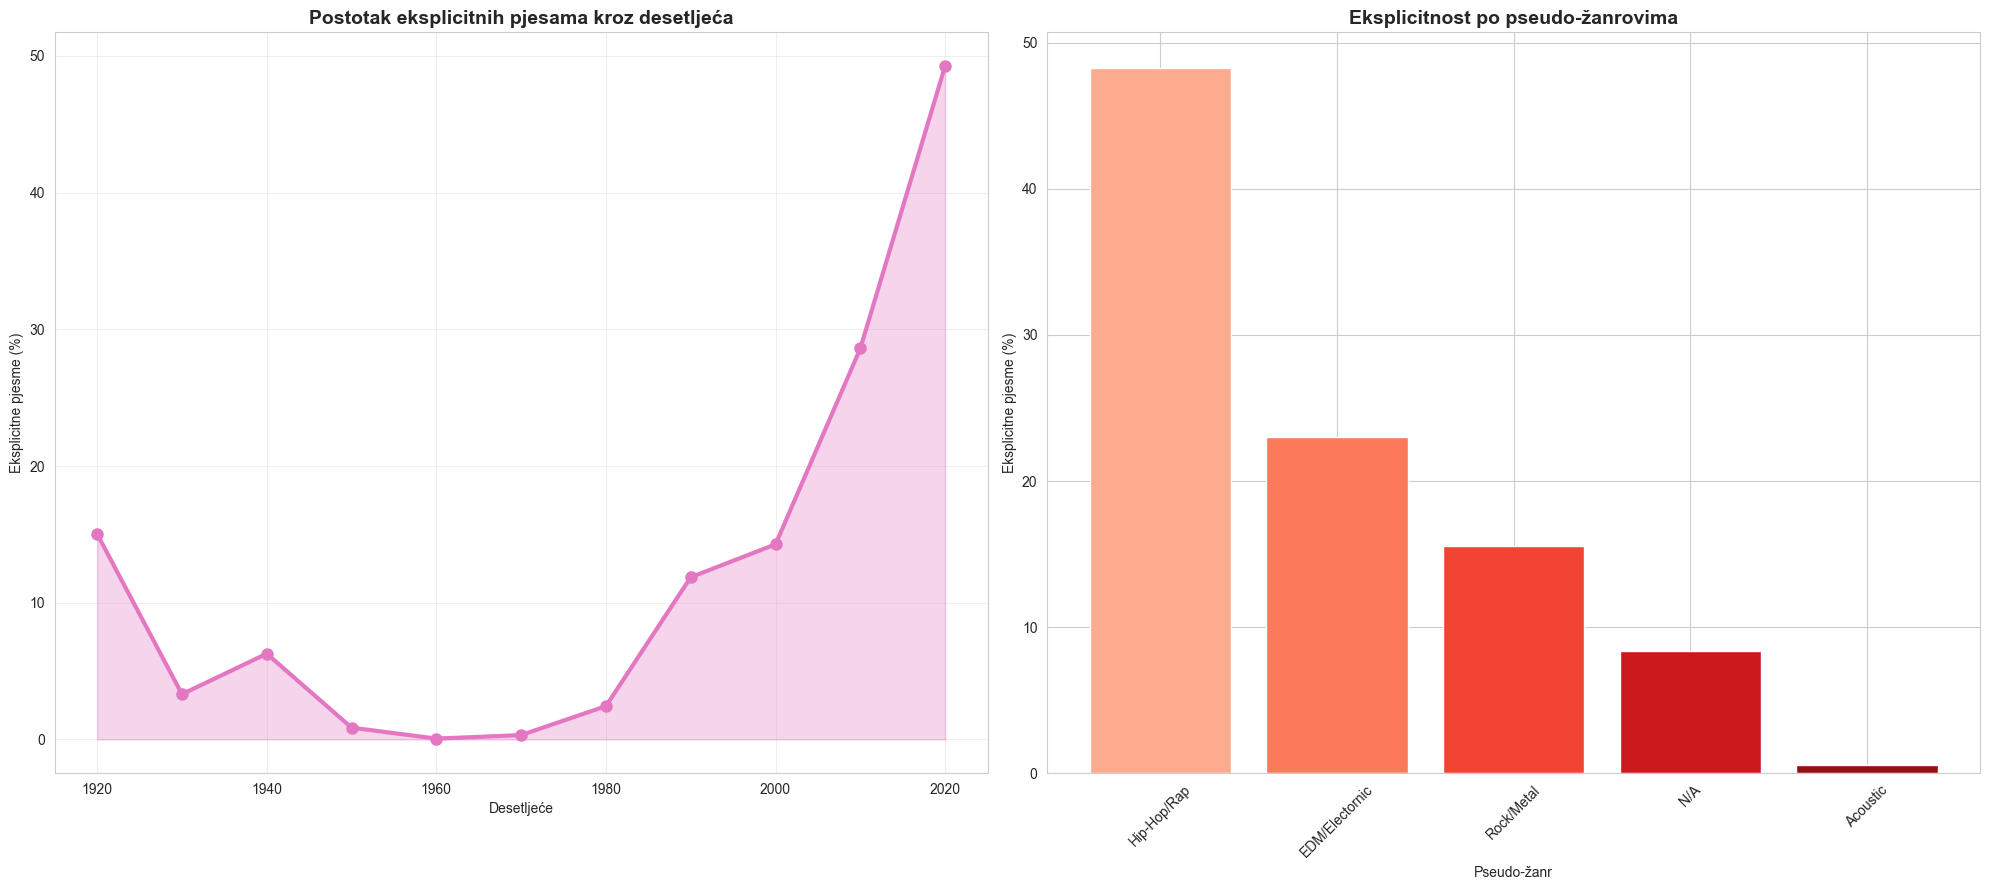

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))
axes[0].plot(
    explicit_decade.index,
    explicit_decade.values,
    marker = 'o',
    linewidth = 3,
    markersize = 8,
    color = '#e377c2'
)
axes[0].fill_between(explicit_decade.index, 0, explicit_decade.values, alpha=0.3, color='#e377c2')

axes[0].set_title('Postotak eksplicitnih pjesama kroz desetljeća', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Desetljeće')
axes[0].set_ylabel('Eksplicitne pjesme (%)')
axes[0].grid(True, alpha=0.3)


bars = axes[1].bar(range(len(genre_explicit)), 
                   genre_explicit.values, 
                   color=plt.cm.Reds(np.linspace(0.3, 0.9, len(genre_explicit))))
axes[1].set_title('Eksplicitnost po pseudo-žanrovima', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pseudo-žanr')
axes[1].set_ylabel('Eksplicitne pjesme (%)')
axes[1].set_xticks(range(len(genre_explicit)))
axes[1].set_xticklabels(genre_explicit.index, rotation=45)

plt.tight_layout()
plt.show()

*Analiza eksplicitnosti*
 - Vidimo jako nisku razinu eksplicitne glazbe tijekom 1950-ih do 1970-ih, čemu je razlog cenzura na radiju u to vrijeme tj. [Hays Code utjecaj](https://en.wikipedia.org/wiki/Hays_Code)
 - Nagli porast od 1970-ih događa se zbog otpuštanja cenzure, pojave hip hopa te kulturnom promjenom gdje su se proslavili izvođači poput Eminema, Dr. Dre-a, NWA i sl. čije su pjesme većinom eksplicitne
 - Vidimo kako trend porasta eksplicitnih pjesama nastavlja rasti što sugerira da su eksplicitne pjesme postale normalnima, razlog ovomu je vjerojatno streming platforme  (YouTube, Spotify) koje dozvoljavaju eksplicitnu glazbu svima
---
*Pseudo žanrovi koje smo definirali*
 - Acoustic: *acousticness > 0.8*
 - EDM/Electronic: *danceability > 0.7 & energy > 0.7*
 - Rock/Metal: *energy  0.8 & loudness > 0.5*
 - Hip-Hop/Rap: *speachiness  0.33*
 - N/A *ostale pjesme bez jasne klasifikacije* 
---
 - Hip Hop ima najveći udio pjesama koje su eksplicitne što je u skladu s temama kojima se bavi rep kao što su ulični život, seksualnost, protesti (npr. Eminem, Kendrick Lamar)
 - EDM ima oko 20% pjesama koju su eksplicitne, zbog fokusiranja na glazbu gdje tekstovi nisu u prvom planu ovaj broj je toliki, ali često je to malo teksta eksplicitno (npr. David Guetta)
 - N/A kategorija sugerira da većina pjesama bez jasne klasifikacije ima malo eksplicitnosti, što potvrđuje da su svojstva po kojima su kreirani pseudo žanrovi dobro odabrani

---
#### Završili smo s osnovnom analizom promjena osnovnih svojstava glazbe kroz vrijeme <br>
*Zanimljivo bi bilo napraviti formulu za hit pjesmu*

#### **Kako napraviti popularnu pjesmu**

In [19]:
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler

1. Priprema podataka
 - kreitati ćemo novi stupac koji odgovara tome je li pjesma hit ili nije

In [20]:
# Hit cemo definirati kao top 20% pjesama po popularnosti
df['is_hit'] = df['popularity'] >= df['popularity'].quantile(0.8)

audio_features = ['acousticness', 'danceability', 'energy', 'valence', 
                     'tempo', 'loudness', 'speechiness', 'instrumentalness', 
                     'liveness', 'duration_min']

analysis_data = df[audio_features + ['is_hit', 'decade', 'popularity']]

print('Ukupno pjesama: ', len(analysis_data))
print('Hit pjesama: ', analysis_data['is_hit'].sum())
print('Ukupno pjesama: ', (~analysis_data['is_hit']).sum())

Ukupno pjesama:  169909
Hit pjesama:  35858
Ukupno pjesama:  134051


2. Statistička analiza
 - provodimo statističku analizu za svaku značajku

1. Izdvojiti ćemo vrijednosti značajke obrizom na to je li pjesma hit ili nije
2. Prosječnom vrijednosti za obje grupe provjeriti ima li razlike tj. koliko su hitovi veći/manji po značajki od ne hitova
3. Testirati ćemo normalnost distribucije, **Sharpio-Wilk testom** provjeravamo jesu li podatci normalno distribuirani, jer za različite distribucije moramo koristiti različite statističke testove
    - **T-test** za distribuciju koja prati normalnu distribuciju
    - **Mann-Whitney U** test za distribuciju koja ne prati normalnu
4. Prema rezultatima Sharpio-Wilkova odabiremo statistički test
5. Provjeravamo koliko je razlika zapravo velika (ne samo je li značajna)
    - Normalni podatci -> **Cohen'd** - razlika u prosjeku dvije grupe tj. koliko standardnih devijacija je razlika između dvije grupe
        - d = (Mean₁ - Mean₂) / Standard_Deviation
        - d = 0.2 -> mali efekt
        - d = 0.5 -> srednji efekt
        - d = 0.8 -> velik efekt
    - Ne normalni podatci -> **Cliff's Delta** - koja je vjerojatnost da je jedna grupa "dominantnija nad drugom" tj. koliko je vjeorjatno da je slučajno odabrana vrijednost iz grupe 1 veća od lsučajno odabrane iz grupe 2
        - delta = P(X₁ > X₂) - P(X₁ < X₂)
        - delta = 0 -> Nema razlike (50-50 šanse)
        - delta = 0.5 -> u **75%** slučajeva grupa 1 > grupa 2
        - delta = 1.0 -> **UVIJEK** grupa 1 > grupa 2


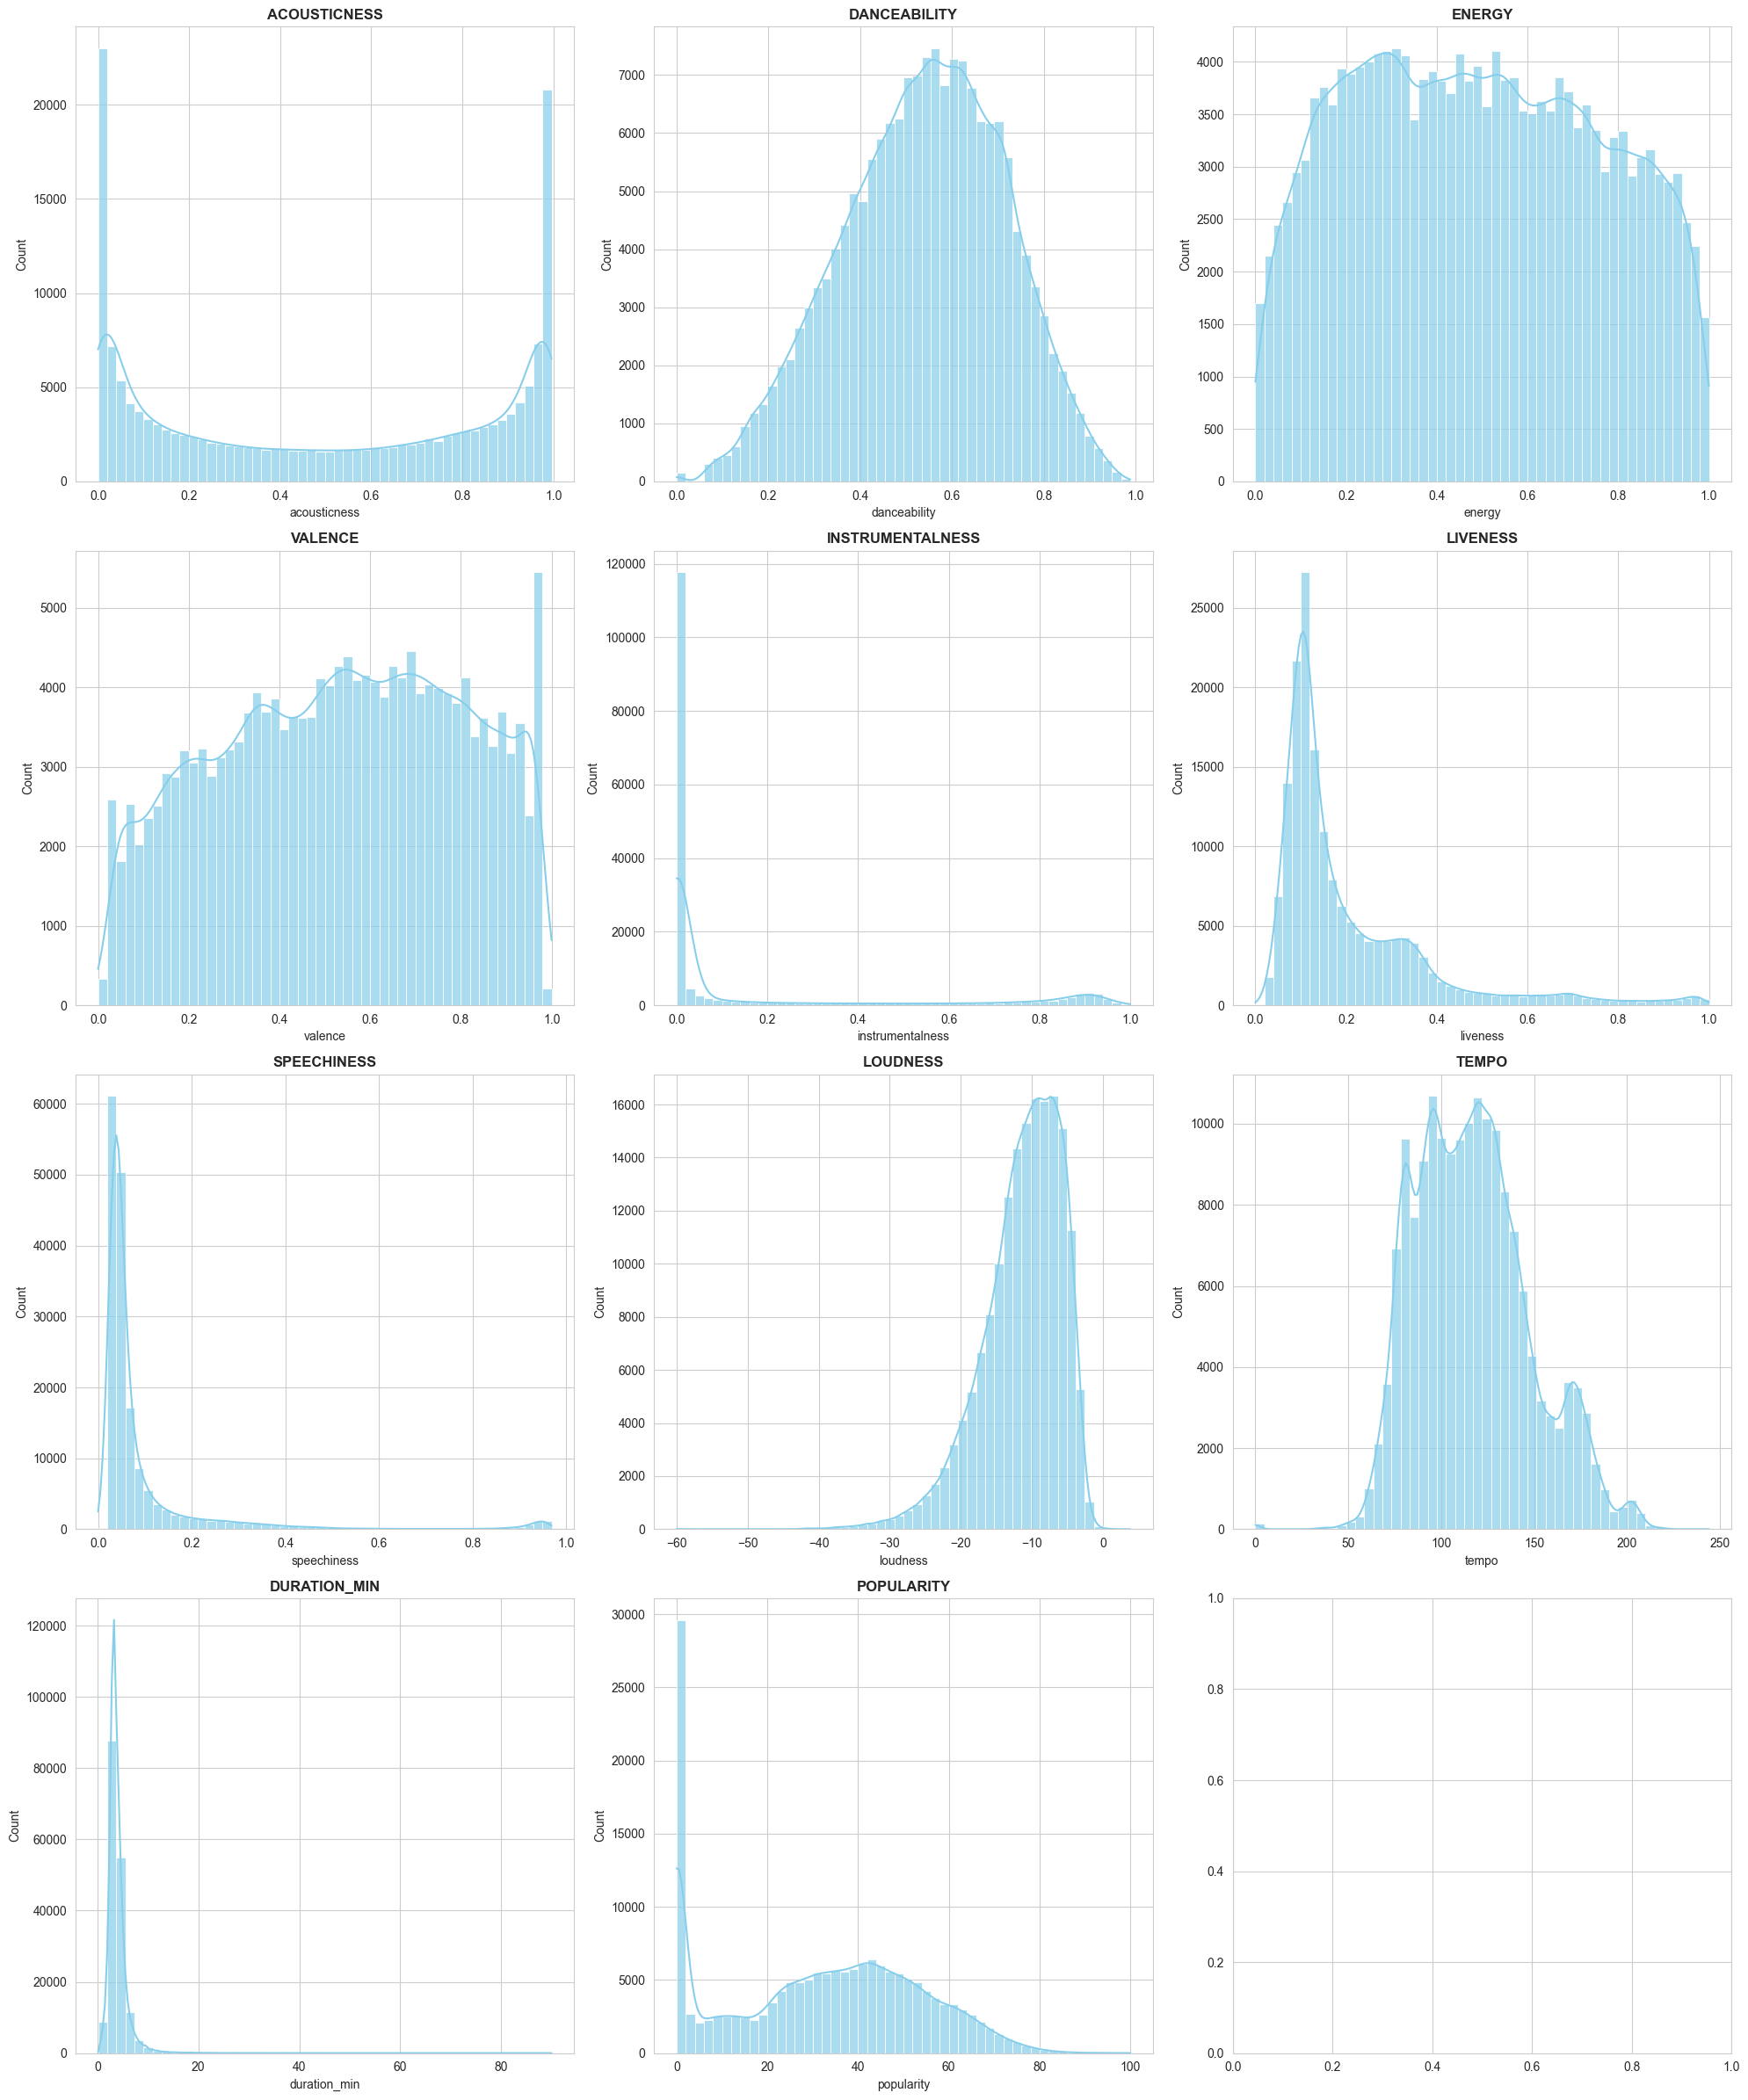

In [21]:
# Distribucije značajki
fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.ravel()

numerical_features = ['acousticness', 'danceability', 'energy', 'valence', 
                     'instrumentalness', 'liveness', 'speechiness',
                     'loudness', 'tempo', 'duration_min', 'popularity']

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    sns.histplot(data=df, x=feature, kde=True, bins=50, ax=ax, color='skyblue', alpha=0.7)
    ax.set_title(f'{feature.upper()}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
statistical_results = {}
significance_level = 0.05

for feature in audio_features:
    hits = analysis_data[analysis_data['is_hit']][feature]
    non_hits = analysis_data[~analysis_data['is_hit']][feature]

    hit_mean = hits.mean()
    non_hit_mean = non_hits.mean()
    mean_diff = hit_mean - non_hit_mean

    sample_size = 10000

    # Shapiro-Wilk test
    _, shapiro_p_hits = stats.shapiro(hits.sample(sample_size, random_state=42))
    _, shapiro_p_non_hits = stats.shapiro(non_hits.sample(sample_size, random_state=42))
    normal_distribution = (shapiro_p_hits > 0.05) and (shapiro_p_non_hits > 0.05)

    # Odabir odgovarajućeg testa
    if normal_distribution:
        # T test
        test_stat, p_value = stats.ttest_ind(hits, non_hits, equal_var=False)
        test_used = 'T-test'

        # Cohen's d 
        double_std = np.sqrt((len(hits)-1)*hits.var() + (len(non_hits-1)*non_hits.var()) /
                             (len(hits) + len(non_hits) - 2))
        effect_size = abs(mean_diff) / double_std
    
    else:
        # Mann-Whitney U test
        test_stat, p_value = stats.mannwhitneyu(hits, non_hits, alternative='two-sided')
        test_used = 'Mann-Whitney U'

        # Cliff's delta
        n1, n2 = len(hits), len(non_hits)
        delta = (test_stat - (n1 * n2 / 2)) / (n1 * n2)
        effect_size = abs(delta)

    
    statistical_results[feature] = {
        'hit_mean': hit_mean,
        'non_hit_mean': non_hit_mean,
        'mean_difference': mean_diff,
        'p_value': p_value,
        'test_used': test_used,
        'effect_size': effect_size,
        'is_significant': p_value < significance_level,
        'direction': 'higher' if mean_diff > 0 else 'lower',
        'normal_dist': normal_distribution
    }

Sada imam dictionary sa statističkim vrijednostima za svaku značajku, trebamo ih ragirati po važnosti <br>
Rangirati ćemo prema p-vrijednosti i effect_size(d/delta) <br>
Potrebno je pronaći značajke sa što manjom p-vrijednosti i sa što većim effect_size
*P-vrijednost "okrenuti" ćemo logaritamskom transofrmacijom*
 - Logaritamska transofrmacija jer je p-vrijednost eksponencijalno distriburiana, kada bi koristili obični pristup *1/p* dobili bi jako velike razlike npr. između 0.1 i 0.001 dobili bi 100x veći score
 - Logaritmiranjem smanjujemo razliku tako da je između 0.1 i 0.001 razlika 3x, korištenjem logaritma
 - Obzirom da je logaritam od broja manjeg od 1 negativan broj, također trebamo uzeti njegovu apsolutnu vrijednost

In [23]:
for feature in statistical_results:
    significance_score = -np.log10(statistical_results[feature]['p_value']) * statistical_results[feature]['effect_size']
    statistical_results[feature]['importance_score'] = significance_score

sorted_features = sorted(statistical_results.keys(),
                         key=lambda x: statistical_results[x]['importance_score'],
                         reverse=True)

Sada nam je ostalo još samo kreirati formulu za hit pjesmu
 - uzeti ćemo u obzit 8 najvažnijih značajki

In [24]:
significant_features = [f for f in sorted_features if statistical_results[f]['is_significant']]

formula_components = []
for i, feature in enumerate(significant_features[:8]):
    result = statistical_results[feature]

    direction_text = 'VIŠE' if result['direction'] == 'higher' else 'MANJE'
    effect_magnitude = ("VELIKI" if result['effect_size'] > 0.8
                        else "SREDNJI" if result['effect_size'] > 0.5
                        else "MALI")
    
    print(f"{i+1:2d}. {feature.upper()}: {direction_text}")
    print(f"    • Razlika: {result['mean_difference']:+.3f}")
    print(f"    • Efekt: {effect_magnitude} ({result['effect_size']:.3f})")
    print(f"    • Test: {result['test_used']}")
    print()
    
    operator = "+" if result['direction'] == 'higher' else "-"
    formula_components.append(f"{operator}{feature}")
    

 1. ACOUSTICNESS: MANJE
    • Razlika: -0.283
    • Efekt: MALI (0.211)
    • Test: Mann-Whitney U

 2. DANCEABILITY: VIŠE
    • Razlika: +0.075
    • Efekt: MALI (0.123)
    • Test: Mann-Whitney U

 3. ENERGY: VIŠE
    • Razlika: +0.170
    • Efekt: MALI (0.186)
    • Test: Mann-Whitney U

 4. LOUDNESS: VIŠE
    • Razlika: +4.246
    • Efekt: MALI (0.253)
    • Test: Mann-Whitney U

 5. INSTRUMENTALNESS: MANJE
    • Razlika: -0.122
    • Efekt: MALI (0.149)
    • Test: Mann-Whitney U

 6. DURATION_MIN: VIŠE
    • Razlika: +0.007
    • Efekt: MALI (0.068)
    • Test: Mann-Whitney U

 7. TEMPO: VIŠE
    • Razlika: +4.463
    • Efekt: MALI (0.046)
    • Test: Mann-Whitney U

 8. LIVENESS: MANJE
    • Razlika: -0.027
    • Efekt: MALI (0.043)
    • Test: Mann-Whitney U



In [25]:
print("Za hit pjesmu s obzirom na prosjek ostalih pjesama potrebno je: ")
for i, feature in enumerate(significant_features[:6]):
        result = statistical_results[feature]
        direction = "POVEĆATI" if result['direction'] == 'higher' else "SMANJITI"
        confidence = "VISOKO" if result['p_value'] < 0.001 else "UMJERENO" if result['p_value'] < 0.01 else "NISKO"
        
        feature_name = feature.replace('_', ' ').replace('ness', '').title()
        print(f"{i+1}. {direction} {feature_name}")
        print()

Za hit pjesmu s obzirom na prosjek ostalih pjesama potrebno je: 
1. SMANJITI Acoustic

2. POVEĆATI Danceability

3. POVEĆATI Energy

4. POVEĆATI Loud

5. SMANJITI Instrumental

6. POVEĆATI Duration Min



*Bolje bi bilo napraviti za svako desetljeće posebno*
 > Napraviti ćemo isto kao u prošlom koraku

In [26]:
from scipy import stats
def analyze_decade_importance(data, decade_name):
    data = data.copy()
    data['is_hit'] = data['popularity'] >= data['popularity'].quantile(0.8)

    features = ['acousticness', 'danceability', 'energy', 'valence', 
                'tempo', 'loudness', 'speechiness', 'instrumentalness', 'liveness']
    
    importance_scores = {}

    for f in features:
        hits = data[data['is_hit']][f]
        non_hits = data[~data['is_hit']][f]

        if len(hits) == 0 or len(non_hits) == 0:
            continue

        test_stat, p_value = stats.mannwhitneyu(hits, non_hits, alternative='two-sided')

        mean_diff = abs(hits.mean() - non_hits.mean())
        n1, n2 = len(hits), len(non_hits)
        delta = (test_stat - (n1 * n2 / 2)) / (n1 * n2)
        effect_size = abs(delta)

        importance_scores[f] = {
            'p_value': p_value,
            'effect_size': effect_size,
            'mean_diff': mean_diff,
            'hits_mean': hits.mean(),
            'non_hits_mean': non_hits.mean(),
            'direction': 'više' if hits.mean() > non_hits.mean() else 'manje',
            'importance': -np.log10(p_value + 1e-10) * effect_size
        }
    
    sorted_features = sorted(importance_scores.items(), key=lambda x: x[1]['importance'], reverse=True)

    return sorted_features, importance_scores

In [27]:
decades = sorted(df['decade'].unique())
decade_analysis = {}

for decade in decades:
    current_decade_data = df[df['decade'] == decade]


    if len(current_decade_data) < 10:
        print(f"Preskačem - premalo podataka")
        continue

    sorted_features, importance_scores = analyze_decade_importance(current_decade_data, f"{decade}te")

    
    decade_analysis[decade] = {
        'top_features': sorted_features[:5],
        'all_scores': importance_scores,
        'decade_stats': {
            'total_songs': len(current_decade_data),
            'avg_popularity': current_decade_data['popularity'].mean(),
        }
    }

    print(f"Top 3 značajke za hit u {decade}s:")
    for i, (feature, scores) in enumerate(sorted_features[:3]):
        print(f"  {i+1}. {feature}: {scores['direction']} (važnost: {scores['importance']:.2f})")

Top 3 značajke za hit u 1920s:
Top 3 značajke za hit u 1930s:
  1. acousticness: manje (važnost: 1.32)
  2. danceability: više (važnost: 1.07)
  3. instrumentalness: manje (važnost: 0.83)
Top 3 značajke za hit u 1940s:
  1. speechiness: manje (važnost: 1.13)
  2. acousticness: više (važnost: 0.67)
  3. instrumentalness: manje (važnost: 0.55)
Top 3 značajke za hit u 1950s:
  1. acousticness: manje (važnost: 1.34)
  2. instrumentalness: manje (važnost: 0.88)
  3. speechiness: manje (važnost: 0.70)
Top 3 značajke za hit u 1960s:
  1. acousticness: manje (važnost: 1.03)
  2. loudness: više (važnost: 0.74)
  3. energy: više (važnost: 0.67)
Top 3 značajke za hit u 1970s:
  1. liveness: manje (važnost: 0.53)
  2. danceability: više (važnost: 0.48)
  3. instrumentalness: manje (važnost: 0.45)
Top 3 značajke za hit u 1980s:
  1. danceability: više (važnost: 0.65)
  2. instrumentalness: manje (važnost: 0.60)
  3. speechiness: manje (važnost: 0.53)
Top 3 značajke za hit u 1990s:
  1. loudness: vi

*Vizualizacija*

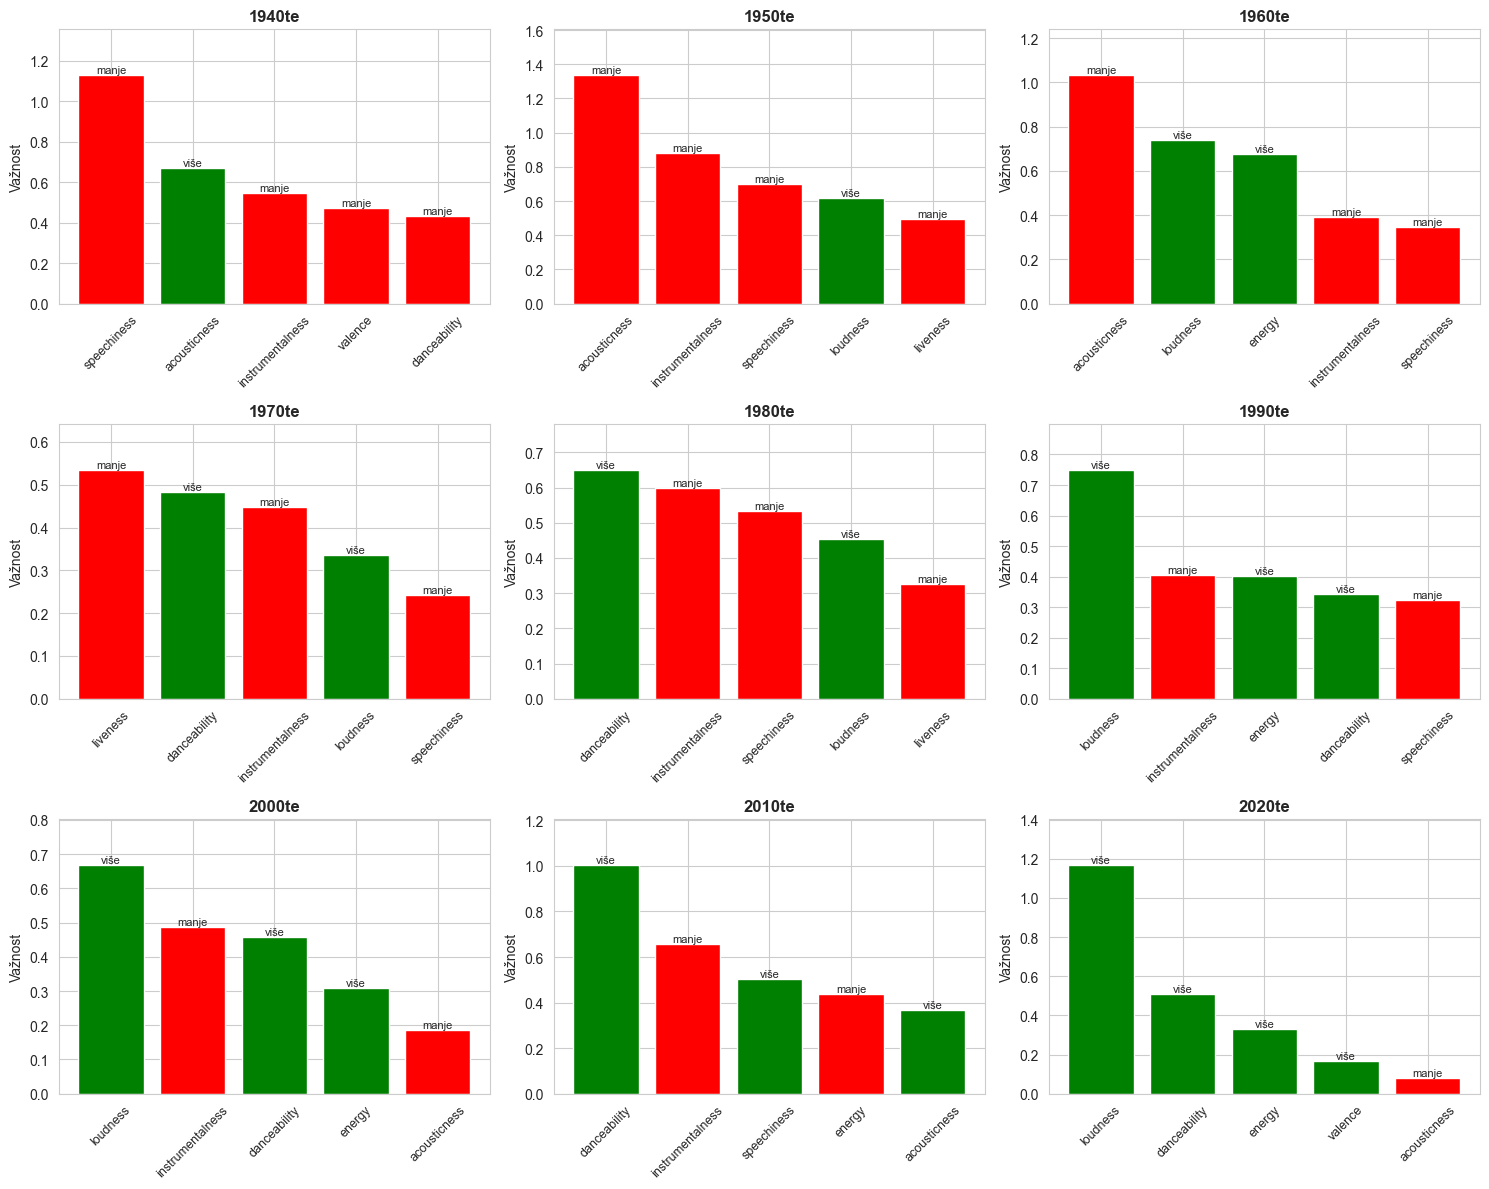

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.ravel()

for idx, decade in enumerate(decades[2:11]):
    ax = axes[idx]

    features = []
    importance = []
    directions = []

    for f, scores in decade_analysis[decade]['top_features'][:5]:
        features.append(f)
        importance.append(scores['importance'])
        directions.append(scores['direction'])


    # Zelena za pozitivan učinak, crvena za negativan
    colors = ['green' if d == 'više' else 'red' for d in directions]
    bars = ax.bar(features, importance, color=colors)
    
    for bar, direction in zip(bars, directions):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{direction}', ha='center', va='bottom', fontsize=8)
    
    stats = decade_analysis[decade]['decade_stats']
    ax.set_title(f"{decade}te", fontsize=12, fontweight='bold')
    ax.set_ylabel('Važnost')
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.set_ylim(0, max([s['importance'] for _, s in decade_analysis[decade]['top_features'][:5]]) * 1.2)

plt.tight_layout()
plt.show()

 - Visoka plesnost je stalna kroz sva desetljeća od 1970-ih
 - Smanjenje glasnoće i energije od 2010-ih 
 - Raniji hitovi su veseliji (valencija)

#### *Korelacija između značajki*

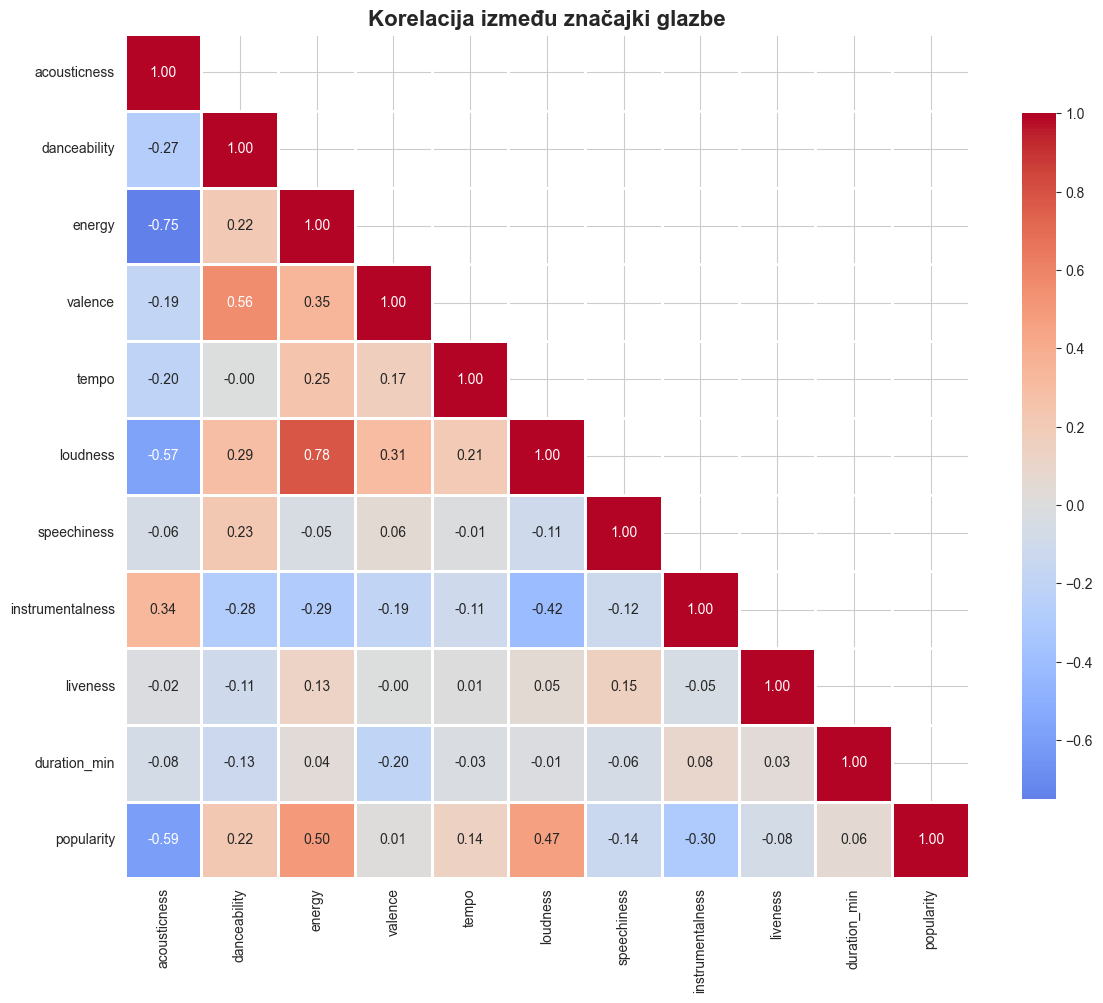

In [29]:
correlation_features = ['acousticness', 'danceability', 'energy', 'valence', 
                       'tempo', 'loudness', 'speechiness', 'instrumentalness', 
                       'liveness', 'duration_min', 'popularity']

correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Korelacija između značajki glazbe', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### *Zanimljiva zapažanja*
 - Akustičnost ima negativnu korelaciju s popularnošću, više akustične pjesme manje su popularne, zato što su pjesem danas više popularne nego rpije, a danas je sve veća pristunost elektroničke glazbe
 - Plesne pjesme imaju veću popularnost, jer streaming platforme preferiraju pjesme sa privlačnim ritmovima
 - Instrumentalne pjesme su manje popularne

---

### **Zaključak**

### Zaključak

Analizom glazbenih podataka pjesama s Spotifyja, u razdoblju od 1921. do 2020., vidjeli smo kako su se glazbena svojstva mijenjala kroz vrijeme.

1. **Evolucija glazbenih svojstava**: Akustičnost je značajno opadala od 1920-ih do 2020-ih, posebno nakon 1950-ih zbog širenja električnih instrumenata. Plesnost je postupno rasla, dosežući vrhunac u 2020-ima, što se povezuje s utjecajem algoritama za preporuku od strane streaming platformi(Spotify, Youtube) koji ove pjesme više preporućuju. Energija je porasla od 1950-ih do 1980-ih, a zatim se stabilizirala, dok je valencija opadala nakon 1980-ih, što odgovara raznovrsnijim "emocijama" u modernim žanrovima poput grungea i hip-hopa. Duljina pjesama se smanjila od 1990-ih, vjerojatno zbog prilagodbe streaming platformama i društvenim mrežama, popularnost je naglo rasla od 1980-ih, zbog pojave MTV-a i drugih platformi koje su omogućile cijeom svijetu da jednostavno slušaju pjesme

2. **Utjecaj tonova i modova**: Tonovi C i D dominirali su u ranim desetljećima (jazz, rock 'n' roll), dok je raznolikost tonova porasla od 1960-ih, odražavajući širenje žanrova. Dur tonovi su prevladavali do 1950-ih, dok je porast mol tonova od 1980-ih potvrđuje smanjenje valencije i utjecaj modernih žanrova poput hip-hopa i emoa.

3. **Tempo i glasnoća**: Prosječni tempo porastao je od 1940-ih do 1970-ih (vrhunac s rockom i diskom), stabilizirajući se na 120 BPM od 1980-ih, idealnom za pop, hip-hop i EDM. Glasnoća je porasla od 1960-ih, posebno nakon 1980-ih zbog "loudness war"-a,stabilizirala se u 2000-ih i 2020-ih uz normalizaciju (LUFS).

4. **Eksplicitnost i pseudo-žanrovi**: Eksplicitnost je porasla od 1970-ih zbog otpuštanja cenzure i utjecaja hip-hopa, dosežući visoke razine u 2020-ima zahvaljujući streaming platformama. Pseudo-žanrovi koje smo samo kreirali su pokazali da hip-hop ima najviši udio eksplicitnih pjesama, dok su akustične pjesme najmanje eksplicitne.

5. **Faktori popularnosti**: Statistička analiza identificirala je da hitovi imaju višu plesnost, energiju, glasnoću i duljinu, ali nižu akustičnost i instrumentalnost. Prema desetljećima, plesnost je stalno važna od 1970-ih, dok glasnoća i energija dominiraju u novijim desetljećima. Korelacija je pokazala negativnu povezanost akustičnosti i instrumentalnosti s popularnošću, te pozitivnu s plesnošću, što potvrđuje utjecaj modernih produkcijskih trendova i algoritama.